Terza Figura: Frontiera di pareto + 9 reservoirs ottimizzati!

In [1]:
# Import needed libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from pypalettes import load_cmap
import numpy as np
from shapely.geometry import Point
from matplotlib.patches import FancyArrowPatch
import scipy.io
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Function to interpolate the colormap with cubic interpolation
def interpolate_cmap(cmap, num_interp_points):
    new_colors = cmap(np.linspace(0, 1, cmap.N))  # Ottieni i colori della colormap discreta
    new_cmap = LinearSegmentedColormap.from_list('my_interpolated_cmap', new_colors, N=num_interp_points)
    return new_cmap



In [3]:
# Reading ShapeFiles and projectig them in web Mercator

reservoirs = gpd.read_file('reservoir.shp')
basin = gpd.read_file('3Sbasin.shp')
rivernetwork = gpd.read_file('rivernetwork.shp')

reservoirs = reservoirs.to_crs(epsg=3857)
basin = basin.to_crs(epsg=3857)
rivernetwork = rivernetwork.to_crs(epsg=3857)


In [4]:
# Cap values for each indicator (the ones used to normalize the values of each objective between 0 and 1 during the optimization)
maxtotalpro = 8.627501095537942e+06 #hp production
maxfirm = 3.207057309002500e+04 #firm hp
maxsed = 30 #sediment loads

In [5]:

# Reading optimization results for flushing
filename = 'optimization_objectives_flush.txt'
data = np.loadtxt(filename)
all_data = data

# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break


fnew = all_data[is_pareto_efficient]


fnew_unique = np.unique(fnew, axis=0)

# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_flush = fnew_unique
fnew_unique_flush[:, 0] = (1 - fnew_unique_flush[:, 0]) * maxsed;
fnew_unique_flush[:, 1] = (1 - fnew_unique_flush[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_flush[:, 2] = (1 - fnew_unique_flush[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{fnew_unique}")


Pareto-efficient points:
[[ 13.20560816   9.73561799 150.88430077]
 [ 13.20004877   9.72098881 175.93686906]
 [ 13.22650839   9.71485924 125.22893001]
 [  8.45122907   9.71377011 205.60634196]
 [ 13.22729815   9.71287077 126.66854293]
 [  8.43566556   9.70933217 224.03309387]
 [ 13.45121325   9.7083625  170.81933266]
 [  8.43827655   9.70558583 234.53038541]
 [ 13.1818574    9.69901244 281.3858765 ]
 [ 13.20694025   9.69899178 191.74476753]
 [ 13.34994725   9.69874476 252.75221271]
 [ 13.18304836   9.68821289 282.89994419]
 [ 14.91370591   9.68766451  68.78864237]
 [ 13.44870891   9.68492218 241.7090936 ]
 [ 13.44679533   9.68306756 242.62654688]
 [ 14.94288803   9.68195301  72.90914002]
 [ 13.47829015   9.67984513 209.88692535]
 [ 13.36402438   9.67919061 249.00420523]
 [ 13.36794187   9.67663433 251.978736  ]
 [ 14.89864132   9.67480729 122.14284672]
 [ 14.91889385   9.6733493   80.85282995]
 [ 14.94905757   9.67330706  76.30306135]
 [ 13.5009468    9.67178436 239.13686285]
 [ 13.212

In [6]:

# Reading optimization results for sluicing
filename = 'optimization_objectives_sluicing.txt'
data = np.loadtxt(filename)
all_data = data

# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break


fnew = all_data[is_pareto_efficient]


fnew_unique = np.unique(fnew, axis=0)

# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_sluicing = fnew_unique
fnew_unique_sluicing[:, 0] = (1 - fnew_unique_sluicing[:, 0]) * maxsed;
fnew_unique_sluicing[:, 1] = (1 - fnew_unique_sluicing[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_sluicing[:, 2] = (1 - fnew_unique_sluicing[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{fnew_unique}")


Pareto-efficient points:
[[  8.48545064  10.69293238  85.7256215 ]
 [  8.55969643  10.68624704  76.24217362]
 [  8.53298208  10.68606248  77.36689363]
 [  8.48973385  10.68232305  80.54368389]
 [  8.55721744  10.67744788  96.0633348 ]
 [  8.55985855  10.67634219  75.64455603]
 [  8.66051052  10.67501812  50.90036103]
 [  8.64623999  10.66828114  89.18124091]
 [  8.64651443  10.6552143   80.56954367]
 [  8.78560146  10.63472327  75.67177136]
 [  8.63727639  10.63013672  94.87493448]
 [  8.9169812   10.61953886  39.09196907]
 [  8.67188797  10.61681971  76.28611589]
 [  8.9194842   10.61633963  39.85053084]
 [  8.77844246  10.61248801 146.98143153]
 [  8.78102901  10.61141142 143.19190041]
 [  8.79214637  10.60637551 116.08325636]
 [  8.91787326  10.59727585 105.78162954]
 [  8.92665303  10.59421805 106.95777748]
 [  8.38025489  10.57171847 173.76828003]
 [  8.91717392  10.55707548 153.75002973]
 [  8.75277934  10.55688474 203.08594817]
 [  9.0452796   10.55470262  58.40368905]
 [  8.917

In [7]:

# Reading optimization results for water rule curve
filename = 'optimization_objectives_waterrulecurve.txt'
data = np.loadtxt(filename)
all_data = data

# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break


fnew = all_data[is_pareto_efficient]


fnew_unique = np.unique(fnew, axis=0)

# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

pareto_matrix = fnew_unique
pareto_matrix[:, 0] = (1 - pareto_matrix[:, 0]) * maxsed;
pareto_matrix[:, 1] = (1 - pareto_matrix[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
pareto_matrix[:, 2] = (1 - pareto_matrix[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{pareto_matrix}")


Pareto-efficient points:
[[  8.68764804  12.05204584  49.98803701]
 [  8.43612872  12.02913042 331.16822145]
 [  8.61693155  12.01365224 166.28690372]
 [  8.70927817  12.00940714  30.02565434]
 [  8.41218215  11.95416772 367.85023736]
 [  8.70086496  11.94361266  76.01684572]
 [  8.4420592   11.90877577 339.91935469]
 [  8.44367416  11.9041133  357.73499144]
 [  8.71121217  11.88858709  54.37244386]
 [  8.44453475  11.88019445 334.90806002]
 [  8.66322159  11.84517406  89.69863086]
 [  8.5025605   11.82715929 247.23485824]
 [  8.70990159  11.82377637  56.75485488]
 [  8.45463833  11.80009254 354.72340082]
 [  8.62983853  11.79201909 143.62335608]
 [  8.63356619  11.78683236 156.76186865]
 [  8.46950138  11.78334517 335.85444138]
 [  8.70523286  11.78268704  60.91791345]
 [  8.42451146  11.77119061 370.26671552]
 [  8.47473988  11.76941222 348.83236088]
 [  8.69225335  11.76567842  92.10545204]
 [  8.71085717  11.76493494  60.37268136]
 [  8.46238188  11.74914457 351.88520627]
 [  8.478

In [8]:
# Historical values of the three objectives
# Obtained simulating VICRes-CASCADE from 2008 to 2022 with the original water rule curve
historicalpro = 8.98376805
historicalfirm = 157.25352679
historicalsedload = 8.39035134

/var/folders/m7/hdv2wgx56_393jmgypswfryr0000gn/T/ipykernel_8741/3920012353.py:184: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


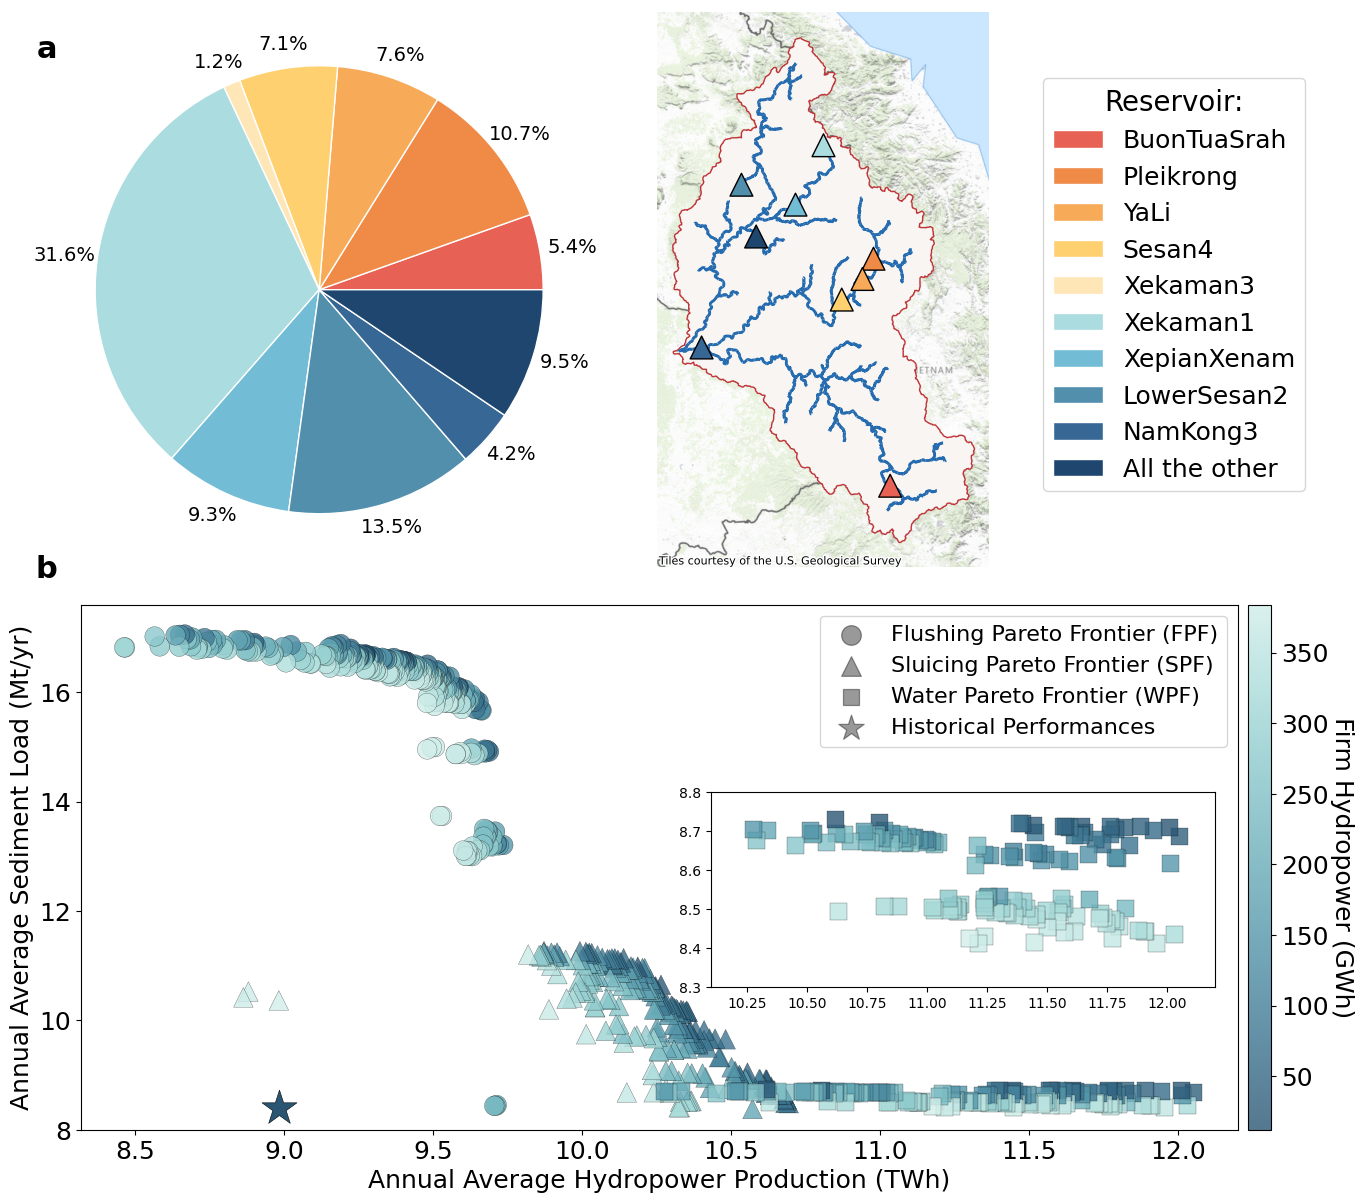

In [9]:
# Identify storagecapacity of the 9 optimized reservoir
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']

# Filter the selected reservoirs and calculate the percentages
selected_reservoirs_data = reservoirs[reservoirs['name'].isin(selected_reservoirs)]
total_storage = reservoirs['storagecap'].sum()
percentages = selected_reservoirs_data['storagecap'] / total_storage * 100

# Calculate the sum of the other reservoirs
other_storage = reservoirs[~reservoirs['name'].isin(selected_reservoirs)]['storagecap'].sum()
percentages = percentages.tolist() + [other_storage / total_storage * 100]
labels = selected_reservoirs_data['name'].tolist() + ['All the other']

# Define the colors for the pie slices
cmap = load_cmap("Hiroshige")
#colors = plt.cm.tab10.colors[:len(selected_reservoirs) + 1]  # Usiamo la palette tab10 di matplotlib


fig = plt.figure(figsize=(14, 15))
#ax4 = plt.subplot(234)
left = 0
bottom = 1
width = 0.4
height = 0.4


ax1 = fig.add_axes([left, bottom, width, height])

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct)

# Pie Plot (top left)
wedges, texts, autotexts = ax1.pie(percentages, labels=None, autopct=lambda pct: func(pct, percentages),
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=cmap.colors, 
                                   pctdistance=0.85)


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(14)
    #autotext.set_weight('bold')


for i, a in enumerate(autotexts):
    x, y = a.get_position()
    a.set_position((1.35*x, 1.3*y))

ax1.legend(wedges, labels, loc='upper left', bbox_to_anchor=(1.77, 0.9), fontsize=18, title='Reservoir:', title_fontsize=20)

#ax1.set_title('3S Reservoir Active Storage Capacity', fontsize=22)

#ax4 = plt.subplot(234)
left = 0.31
bottom = 1.015
width = 0.5
height = 0.37

ax2 = fig.add_axes([left, bottom, width, height])
#ax2 = plt.subplot(222)
ax2.axis('off')
cmap1 = load_cmap("BuRd")
cmap1 = interpolate_cmap(cmap1, 1000)
basin.plot(ax=ax2, facecolor=cmap1(0.51), edgecolor=cmap1(0.95))

#srepok.plot(ax=ax, facecolor="none", edgecolor="green", label='Srepok Sub-basin')
#sesan.plot(ax=ax, facecolor="none", edgecolor="orange", label='Sesan Sub-basin')
#sekong.plot(ax=ax, facecolor="none", edgecolor="purple", label='Sekong Sub-basin')
rivernetwork.plot(ax=ax2, color=cmap1(0.015),linewidth=2,zorder=1)
# For the bubble plot, use the 'markersize' parameter with the 'storagecapacity' column
# Plot with the reservoirs as triangles (top right)
colors = cmap(np.linspace(0, 1, len(selected_reservoirs)))
color_map = dict(zip(selected_reservoirs_data['name'], colors))

scatter_colors = [color_map[res] for res in selected_reservoirs_data['name']]

# scatter plot
ax2.scatter(selected_reservoirs_data.geometry.x, selected_reservoirs_data.geometry.y, marker='^', s=270, c=scatter_colors,edgecolors='black', label='Reservoirs')


ctx.add_basemap(ax2, crs=reservoirs.crs.to_string(),source=ctx.providers.USGS.USTopo)

ax2.axis('off')

left = 0.03
bottom = 0.64
width = 0.85
height = 0.35


ax3 = fig.add_axes([left, bottom, width, height])
cmap=load_cmap("Teal")
cmap = interpolate_cmap(cmap, 1000)
cmap=cmap.reversed()
#ax3 = plt.subplot(212)
#ctx.add_basemap(ax, crs=reservoirs.crs.to_string(),zoom = 10,source=ctx.providers.CartoDB.Positron)
#ctx.add_basemap(ax, crs=reservoirs.crs.to_string(),zoom = 10,source=ctx.providers.NASAGIBS.ASTER_GDEM_Greyscale_Shaded_Relief)



#color_values_flush = fnew_unique_flush['fnew_unique_flush'][:, 2]
color_values_flush = fnew_unique_flush[:, 2]
color_values_sluicing = fnew_unique_sluicing[:, 2]
color_values_water = pareto_matrix[:, 2]

marker_size = 200
marker_alpha = 0.8
# Scatter plot for fnew_unique_flush
scatter_1 = ax3.scatter(0,
                           0,
                           s=marker_size, c='black', alpha=0.4,
                           marker='o',edgecolors='black',linewidth=0.9, label='Flushing Pareto Frontier (FPF)')

# Scatter plot for fnew_unique_sluicing
scatter_2 = ax3.scatter(0,
                              0,
                              s=marker_size, c='black', alpha=0.4,
                              marker='^',edgecolors='black',linewidth=0.9, label='Sluicing Pareto Frontier (SPF)')

# Scatter plot for pareto_matrix (Water Rule Curve)
scatter_3 = ax3.scatter(0,
                           0,
                           s=120, c='black', alpha=0.4,
                           marker='s',edgecolors='black',linewidth=0.9, label='Water Pareto Frontier (WPF)')

# Scatter plot for historicalpro e historicalsedload with pentagram marker
scatter_4 = ax3.scatter(0, 0,
                                s=370, c='black', alpha=0.4, marker='*',edgecolors='black',linewidth=0.9,
                                label='Historical Performances')
# Scatter plot for fnew_unique_flush
scatter_flush = ax3.scatter(fnew_unique_flush[:, 1], 
                            fnew_unique_flush[:, 0],
                           s=marker_size, c=color_values_flush, cmap=cmap, alpha=marker_alpha,
                           marker='o',edgecolors='black',linewidth=0.2)

# Scatter plot for fnew_unique_sluicing
scatter_sluicing = ax3.scatter(fnew_unique_sluicing[:, 1], 
                              fnew_unique_sluicing[:, 0],
                              s=marker_size, c=color_values_sluicing, cmap=cmap, alpha=marker_alpha,
                              marker='^',edgecolors='black',linewidth=0.2)

# Scatter plot for pareto_matrix (Water Rule Curve)
scatter_water = ax3.scatter(pareto_matrix[:, 1],
                           pareto_matrix[:, 0],
                           s=150, c=color_values_water, cmap=cmap, alpha=marker_alpha,
                           marker='s',edgecolors='black',linewidth=0.2)

# Scatter plot for historicalpro e historicalsedload
scatter_historical = ax3.scatter(historicalpro, historicalsedload,
                                s=700, c=historicalfirm,cmap=cmap, alpha=1.0, marker='*',edgecolors='black',linewidth=0.4)


divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.1)

cb = plt.colorbar(scatter_flush, cax=cax)

cb.set_label('Firm Hydropower (GWh)', fontsize=18, rotation=270, labelpad=18)
cb.ax.tick_params(labelsize=18)


ax3.set_xlabel('Annual Average Hydropower Production (TWh)', fontsize=18)
ax3.set_ylabel('Annual Average Sediment Load (Mt/yr)', fontsize=18)
#ax3.set_title('Water Flushing and Sluicing Pareto Frontier Comparison', fontsize=26)
ax3.set_xlim(5.2 * 10 ** 6 * 10 ** (-6) * 24 / 15, 12.2)
ax3.set_ylim(8, 17.6)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.legend(fontsize=16)
ax3.text(5.15 * 10 ** 6 * 10 ** (-6) * 24 / 15, 18.1, 'b', fontsize=22, ha='right',fontweight='bold')
ax3.text(5.15 * 10 ** 6 * 10 ** (-6) * 24 / 15, 27.6, 'a', fontsize=22, ha='right',fontweight='bold')
# Defining x and y values for zooming
ylim_zoom = [8.3, 8.8]
xlim_zoom = [10.1, 12.2]

ax_zoom = fig.add_axes([0.48, 0.735, 0.36, 0.13])
ax_zoom.scatter(pareto_matrix[:, 1], pareto_matrix[:, 0],
                s=150, c=color_values_water, cmap=cmap, alpha=marker_alpha,edgecolors='black',linewidth=0.2,
                marker='s')
ax_zoom.set_xlim(xlim_zoom)
ax_zoom.set_ylim(ylim_zoom)
#ax_zoom.set_title('Zoom on Water Rule Curve Pareto Frontier', fontsize=16)
ax_zoom.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
fig.savefig('Figure3.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
# show
plt.show()

In [6]:
#Counting Percentage of solutions that dominate historical condition.
def is_pareto_dominant(point, others):
    
    for other in others:
        if not (point[0] >= other[0] and point[1] >= other[1] and point[2] >= other[2]):
            return False
        if (point[0] > other[0] or point[1] > other[1] or point[2] > other[2]):
            return True
    return False


In [7]:

historical_conditions = np.column_stack((historicalsedload, historicalpro, historicalfirm))

def count_pareto_dominant(points, historical_conditions):
    count = 0
    for point in points:
        if is_pareto_dominant(point, historical_conditions):
            count += 1
    return count

fnew_unique_flush_dominant = count_pareto_dominant(fnew_unique_flush['fnew_unique_flush'], historical_conditions)
fnew_unique_sluicing_dominant = count_pareto_dominant(fnew_unique_sluicing['fnew_unique_sluicing'], historical_conditions)
pareto_matrix_dominant = count_pareto_dominant(pareto_matrix['pareto_matrix'], historical_conditions)

print(f"fnew_unique_flush dominant compared to historical conditions : {fnew_unique_flush_dominant} solutions")
print(f"fnew_unique_sluicing dominant compared to historical conditions: {fnew_unique_sluicing_dominant} solutions")
print(f"pareto_matrix dominant compared to historical conditions: {pareto_matrix_dominant} solutions")


fnew_unique_flush dominant compared to historical conditions : 196 solutions
fnew_unique_sluicing dominant compared to historical conditions: 110 solutions
pareto_matrix dominant compared to historical conditions: 105 solutions


In [18]:
fnew_unique_flush['fnew_unique_flush'].shape


(310, 3)

In [16]:
fnew_unique_sluicing['fnew_unique_sluicing'].shape


(226, 3)

In [17]:
pareto_matrix['pareto_matrix'].shape

(140, 3)